# Stellar Classification Shortlist

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import load_model

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from scikeras.wrappers import KerasClassifier

2022-08-09 06:39:00.165327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-09 06:39:00.165361: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
X_train = pd.read_csv('data/ClassBalanced/xtrain.csv')
y_train_label = pd.read_csv('data/ClassBalanced/ytrain.csv')

y_train = LabelEncoder().fit_transform(y_train_label)
y_train = y_train.astype(int)

/home/fabio/.venv/myproj/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
y_train

array([2, 0, 0, ..., 2, 2, 2])

In [7]:
# MLP Classifier

def create_MLP_model():
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def build_MLP():
    model = create_MLP_model()
    return KerasClassifier(model=create_MLP_model, epochs=5, batch_size=32, verbose=0)

In [44]:
models = []

models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1,kernel='rbf',gamma=1)))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=50, max_iter=500)))
models.append(('ADA', AdaBoostClassifier()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=1000,shuffle=True) # 10-FOLD
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.930735 (0.002287)
ET: 0.979250 (0.001073)
XGB: 0.979426 (0.001066)


/home/fabio/.venv/myproj/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/fabio/.venv/myproj/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

KNN: 0.965347 (0.001575)
CART: 0.967341 (0.001538)
RF: 0.979619 (0.000756)
NB: 0.918676 (0.002883)
SVM: 0.953723 (0.001799)
MLP: 0.974188 (0.001413)
ADA: 0.705528 (0.082870)


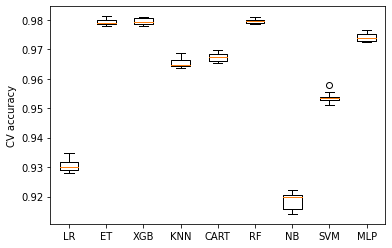

In [49]:
# boxplot algorithm comparison
fig = plt.figure() 
#fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results[:-1]) # Remove ADA
plt.ylabel('CV accuracy')
ax.set_xticklabels(names[:-1]) 
plt.show()

Take XGB and RFC on and LR for comparison.